In [520]:
import requests
import pandas as pd
import tweepy
import json
import numpy as np

In [521]:

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

# Gathering data

The data was gathered from three sources.

**1 Data Source: The tweet image predictions download using the Requests library  from the URL provided:**

In [522]:
#reading the file and putting it inside a data frame predictions
predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [523]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**2 Data Source: Reading the file ' twitter_archive_enhanced.csv' and putting it inside a data frame 'archive'**

In [524]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [525]:
len(archive)

2356

In [526]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


**3 Data Source: Quering the Twitter API  for each tweet's retweet count, favourite count,
using 'tweepy' library and storing in 'tweet_json.txt'**

*Creating a tweepy.API instance*

*Quering Twitter's API for JSON data for each tweet ID in the Twitter archive*

*Reading the file 'tweet_json.txt' and putting it inside a data frame 'apitweets'*

In [527]:
apitweets = pd.read_json('tweet_json.txt', lines=True)

In [528]:
apitweets=apitweets.loc[:,['id','retweet_count','favorite_count']]

In [529]:
apitweets

,id,retweet_count,favorite_count
0,892420643555336193,6902,32993
1,892177421306343426,5201,28532
2,891815181378084864,3433,21444
3,891689557279858688,7117,35988
4,891327558926688256,7637,34412
...,...,...,...
2321,666049248165822465,36,87
2322,666044226329800704,113,244
2323,666033412701032449,35,98
2324,666029285002620928,39,111


**Combining three sources together in one df (using left joins to leave as much rows as possible for analysis)**

In [530]:
joint_dogs = pd.merge(archive,apitweets,how='left',left_on='tweet_id',right_on='id')
joint_dogs_full = pd.merge(joint_dogs,predictions, how= 'left', on= 'tweet_id') 
joint_dogs_full = joint_dogs_full.drop('id',axis=1)

# Assessing data

'joint_dogs_full' dataframe was saved as 'joint_dogs_full.csv' <br> Both 'joint_dogs_full' dataframe and 'joint_dogs_full.csv' was used for visual  assessment.

In [318]:
#checking for Non-Null Counts and  Data types  
joint_dogs_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [319]:
#visual assessment showed strange results so checking value range
joint_dogs_full['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [320]:
#visual assessment showed strange results so checking value range
joint_dogs_full['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

## Quality

* Issue 1: columns: p1,p2,p3 (predicted dog breeds) are lacking consistancy, some are lowercase, some uppercase. There is underscores in instead of spaces
* Issue 2: some rows are retweets
* Issue 3: some rows are replies
* Issue 4: some rating denumerators are not 10:
     * lower than 10 - mistakes
     * higher than 10 - mistakes
* Issue 5: some rating numerators are too low or high (rating was a joke or wrongly extracted, being float type) 
* Issue 6: rating numerator type should be float as some values should be float
* Issue 7: Incorrect datatype in columns : 
    * tweet_id type is int, recommended string
    * timestamp type is object 
    * retweet_count type is float 
    * favourite_count type is float 

## Tidiness

* Issue 1: columns: one variable- dog stage in 4 columns : doggo, flooffer,pupper, puppo
* Issue 2: two variables - prediction and confidence interval in 9 columns : p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p1_conf,p2_conf,p3_conf
* Issue 3: empty columns (after cleaning)
    


* Issue 0 <br> Numerator and denominator of pictures of group dogs. Visual assessment showed that rating denominator greater than 20 are likely to be assigned to the pictures of groups of dogs. Some pictures of groups of dogs are rated not out of 10, but out of (number of dogs on the picture multiplied by 10), example 7 dogs on the picture could be rated 77/70) Numerator in this case is multiplied by the number of dogs on the picture. There is strong relationship between numerator and denominator for group pictures, both of them are multiplied by the same coefficient. This could cause problems to compare ratings. Not all group pictures rated like that some of them rated out of 10. The numbers are valid, but inconsistent.
To compare dogs rating they should be normalized. 'Normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging'.-'https://en.wikipedia.org/wiki/Normalization_(statistics)'

# Cleaning data

## Quality

In [531]:
#joint_dogs_clean copy of joint_dogs_full dataframe was created
joint_dogs_clean=joint_dogs_full.copy()

**Issue 1: columns: p1,p2,p3 (predicted dog breeds) are lacking consistancy, some are lowercase, some uppercase. There is underscores in instead of spaces**

### Define:
make all breeds lowercase and remove ubderscores between words

### Code:

In [532]:
joint_dogs_clean['p1']=joint_dogs_clean['p1'].str.strip().str.lower().str.replace('_',' ')
joint_dogs_clean['p2']=joint_dogs_clean['p2'].str.strip().str.lower().str.replace('_',' ')
joint_dogs_clean['p3']=joint_dogs_clean['p3'].str.strip().str.lower().str.replace('_',' ')

### Test:

In [376]:
#check
joint_dogs_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1679,682032003584274432,NaN,NaN,2015-12-30 02:54:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ulysses. He likes holding hands and his eyes are magic. 11/10 https://t.co/gPmJHmtgak,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682032003584274432/photo/1,11,10,Ulysses,None,None,None,None,1770.0,5951.0,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1.0,schipperke,0.997953,True,groenendael,0.000676,True,miniature pinscher,0.000211,True
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,"https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1",13,10,None,None,None,pupper,None,12390.0,0.0,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3.0,chihuahua,0.346545,True,dalmatian,0.166246,True,toy terrier,0.117502,True
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rusty. He's going D1 for sure. Insane vertical. 13/10 would draft https://t.co/AsykOwMrXQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020293709826/photo/1,13,10,Rusty,None,None,None,None,2960.0,9365.0,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1.0,chow,0.090341,True,binoculars,0.083499,False,irish setter,0.077456,True
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see an extremely rare Bearded Floofmallow. Only a few left in the wild. 11/10 would pet with a purpose https://t.co/jVJJKlPbvq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074226274305/photo/1,11,10,None,None,None,None,None,1167.0,4016.0,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1.0,great pyrenees,0.720337,True,samoyed,0.129542,True,kuvasz,0.122451,True
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/839990271299457024/photo/1,https://twitter.com/dog_rates/status/839990271299457024/photo/1",13,10,Sojourner,None,None,None,None,2035.0,12225.0,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2.0,staffordshire bullterrier,0.604938,True,american staffordshire terrier,0.311540,True,boston bull,0.037159,True
1302,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948723478529/photo/1,12,10,Harper,None,None,None,None,5639.0,15313.0,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1.0,golden retriever,0.383223,True,cocker spaniel,0.165930,True,chesapeake bay retriever,0.118199,True
1263,710117014656950272,NaN,NaN,2016-03-16 14:54:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a

**Issue 2: some rows are retweets**

### Define: 
remove rows with retweeted_status_id is not null

### Code:

In [533]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()

In [534]:
joint_dogs_clean = joint_dogs_clean[joint_dogs_clean['retweeted_status_id'].isnull()]

### Test:

In [535]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**Issue 3: some rows are replies**

### Define:
remove rows with in_reply_to_status_id is not null

### Code: 

In [536]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()
joint_dogs_clean = joint_dogs_clean[joint_dogs_clean['in_reply_to_status_id'].isnull()]

### Test:

In [381]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

**Issue 4: some rating denumerators are not 10:** higher than 10 - mistakes

In [100]:
#finding denumerator >10
joint_dogs_clean[joint_dogs_clean['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,2964.0,11329.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,2001.0,4382.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,11950.0,31821.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden retriever,0.807644,True,kuvasz,0.101286,True,labrador retriever,0.023785,True
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None,1128.0,3472.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,lakeside,0.501767,False,breakwater,0.051351,False,king penguin,0.049444,False
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,1411.0,3704.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,187.0,2150.0,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,siberian husky,0.396495,True,malamute,0.317053,True,eskimo dog,0.273419,True
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKm

### Define: 
* tweet_ids: 	731156023742988288,704054845121142784  'name' should be 'None' instead 'this' and 'a'
* tweet_ids: 716439118184652801, 740373189193256964, 682962037429899265 'rating_numerator' and 'rating_denominator' were extracted incorrectly so should be reassigned	

In [537]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()


### Code:

In [538]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==731156023742988288,'name']='None'
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==731156023742988288,'rating_numerator']=12 
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==731156023742988288,'rating_denominator']=10

joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==704054845121142784,'name']='None'
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==704054845121142784,'rating_numerator']=12 
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==704054845121142784,'rating_denominator']=10

joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==716439118184652801,'rating_numerator']=11 
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==716439118184652801,'rating_denominator']=10

joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==740373189193256964,'rating_numerator']=14 
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==740373189193256964,'rating_denominator']=10

joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==682962037429899265,'rating_numerator']=10
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==682962037429899265,'rating_denominator']=10


### Test:

In [56]:
# Test if changed correctly

In [ ]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==731156023742988288]

In [ ]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==704054845121142784]

In [ ]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==716439118184652801]

In [ ]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==740373189193256964]

In [ ]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==682962037429899265]

In [383]:
joint_dogs_clean['rating_denominator'].value_counts()

10     2085
80        2
70        1
7         1
150       1
20        1
90        1
50        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

**Issue 4: some rating denumerators are not 10:** lower than 10 - mistakes

In [384]:
joint_dogs_clean[joint_dogs_clean['rating_denominator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,1309.0,4932.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,golden retriever,0.871342,True,tibetan mastiff,0.036708,True,labrador retriever,0.025823,True
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None,55.0,120.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,maltese dog,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True


### Define:
* tweet_id: 810984652412424192 does not have rating, we delete it as no value for the site(WeRateDogs) analysis
* tweet_id: 666287406224695296 was extracted incorrectly so should be reassigned

In [249]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()

### Code:

In [539]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==666287406224695296,'rating_numerator']=9
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==666287406224695296,'rating_denominator']=10

sam = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==810984652412424192]
joint_dogs_clean=joint_dogs_clean.drop(sam.index, axis=0)


### Test:

In [108]:
#check value range after cleaning
joint_dogs_clean['rating_denominator'].value_counts()

10     2086
80        2
70        1
150       1
20        1
90        1
50        1
40        1
110       1
120       1
Name: rating_denominator, dtype: int64

**Issue 5: some rating numerators are too low or high (rating was a joke or wrongly extracted, being float type)**

dealing with joke ratings and float ratings, extremes

In [109]:
# finding extremes (visual check)
joint_dogs_clean.loc[joint_dogs_clean['rating_numerator']>15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,2964.0,11329.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,5636.0,16941.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,pomeranian,0.467321,True,persian cat,0.122978,False,chow,0.102654,True
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,1471.0,6041.0,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,0.946718,True,cocker spaniel,0.015950,True,lhasa,0.006519,True
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,2001.0,4382.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,2241.0,4695.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,649.0,2562.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden retriever,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None,509.0,2093.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated 

### Define:
* tweet_id 749981277374128128 - independence dog ovverated as a joke, delete this row
* tweet_id 670842764863651840 - not a dog , but a person rated as a joke, delete this row
* tweet_ids 786709082849828864,778027034220126208,680494726643068929 were extracted incorrectly so should be reextracted and type float assigned 

### Code:

In [543]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()
#  dealing with extremes
america = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==749981277374128128]
joint_dogs_clean=joint_dogs_clean.drop(america.index, axis=0)
person = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==670842764863651840]
joint_dogs_clean=joint_dogs_clean.drop(person.index, axis=0)

In [544]:
#  dealing with wrongly extracted floats
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==786709082849828864,'rating_numerator'] = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==786709082849828864]['text'].str.extract('(\d{1,2}\.\d{1,2})',expand=False).astype(float)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==778027034220126208,'rating_numerator'] = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==778027034220126208]['text'].str.extract('(\d{1,2}\.\d{1,2})',expand=False).astype(float)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id'] ==680494726643068929,'rating_numerator'] = joint_dogs_clean[joint_dogs_clean['tweet_id'] ==680494726643068929]['text'].str.extract('(\d{1,2}\.\d{1,2})',expand=False).astype(float)

### Test:

In [126]:
joint_dogs_clean[joint_dogs_clean['tweet_id'] ==786709082849828864]['rating_numerator']

695    9.75
Name: rating_numerator, dtype: float64

In [127]:
joint_dogs_clean[joint_dogs_clean['tweet_id'] ==778027034220126208]['rating_numerator']

763    11.27
Name: rating_numerator, dtype: float64

In [198]:
joint_dogs_clean[joint_dogs_clean['tweet_id'] ==680494726643068929]['rating_numerator']

1712    11.26
Name: rating_numerator, dtype: float64

In [545]:
joint_dogs_clean['rating_numerator'].value_counts()

12.00     488
10.00     437
11.00     414
13.00     287
9.00      153
8.00       98
7.00       51
14.00      39
5.00       34
6.00       32
3.00       19
4.00       16
2.00        9
1.00        4
11.27       1
9.75        1
0.00        1
99.00       1
80.00       1
45.00       1
44.00       1
121.00      1
11.26       1
84.00       1
144.00      1
88.00       1
165.00      1
Name: rating_numerator, dtype: int64

**Issue 5: some rating numerators are too low or high (rating was a joke or wrongly extracted, being float type)**

checking values lower than 10 and dealing if mistake

### Define:
after visual assessment seems the majority is legitimate, few mistakes:
    
    * twitter_id 722974582966214656 extracted wrongly numerator should be reaasigned to 13
    * twitter_id 883482846933004288 extracted wrongly numerator should be reextracted

### Code:

In [546]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()

In [547]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']==722974582966214656,'rating_numerator']=13

In [548]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']==883482846933004288,'rating_numerator']=joint_dogs_clean[joint_dogs_clean['tweet_id']==883482846933004288]['text'].str.extract('(\d{1,2}\.\d{1,2})',expand=False).astype(float) 

### Test:

In [134]:
#check
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']==722974582966214656]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,20,None,None,None,None,None,1411.0,3704.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True


In [135]:
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']==883482846933004288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,None,None,None,None,8124.0,39151.0,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden retriever,0.943082,True,labrador retriever,0.032409,True,kuvasz,0.005501,True


In [549]:
joint_dogs_clean['rating_numerator'].value_counts()

12.00     488
10.00     437
11.00     414
13.00     288
9.00      153
8.00       98
7.00       51
14.00      39
5.00       33
6.00       32
3.00       19
4.00       15
2.00        9
1.00        4
13.50       1
11.27       1
9.75        1
0.00        1
99.00       1
80.00       1
45.00       1
44.00       1
121.00      1
11.26       1
84.00       1
144.00      1
88.00       1
165.00      1
Name: rating_numerator, dtype: int64

In [550]:
joint_dogs_clean['rating_denominator'].value_counts()

10     2084
80        2
70        1
150       1
20        1
90        1
50        1
40        1
110       1
120       1
Name: rating_denominator, dtype: int64

**Issue 0: Numerator and denominator of pictures of group dogs. Visual assessment showed that rating denominator greater than 20 are likely to be assigned to the pictures of groups of dogs. Some pictures of groups of dogs are rated not out of 10, but out of (number of dogs on the picture multiplied by 10), example 7 dogs on the picture could be rated 77/70) Numerator in this case is multiplied by the number of dogs on the picture. There is strong relationship between numerator and denominator for group pictures, both of them are multiplied by the same coefficient. This could cause problems to compare ratings. Not all group pictures rated like that some of them rated out of 10. The numbers are valid, but inconsistent.
To compare dogs rating they should be normalized. 'Normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging'.-'https://en.wikipedia.org/wiki/Normalization_(statistics)'**

In [255]:
#finding tweets with pictures of group dogs
joint_dogs_clean.loc[joint_dogs_clean['rating_denominator']>=20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,None,None,None,None,2964.0,11329.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,None,None,None,None,2001.0,4382.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,20,None,None,None,None,None,1411.0,3704.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,None,None,None,None,649.0,2562.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden retriever,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,None,None,None,None,509.0,2093.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated wheaten terrier,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,None,None,None,None,580.0,2215.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40,None,None,None,None,None,1248.0,3101.0,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,labrador retriever

### Define:

Creating two new columns 'norm_rating_numerator' and 'norm_rating_denominator' copies of 'rating_numerator' and 'rating_denominator' wit normalized ratings aka adjust values measured on different scales to a notionally common scale

### Code:

In [551]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()
joint_dogs_clean['norm_rating_numerator'] = joint_dogs_clean['rating_numerator']
joint_dogs_clean['norm_rating_denominator'] = joint_dogs_clean['rating_denominator']


In [552]:
# normalization of ratings means adjusting values measured on different scales to a notionally common scale
mask = (joint_dogs_clean['norm_rating_denominator']>=20) & (joint_dogs_clean['name']=='None')
joint_dogs_clean.loc[mask,'norm_rating_numerator']=joint_dogs_clean[mask]['norm_rating_numerator']/(joint_dogs_clean[mask]['norm_rating_denominator']/10)
joint_dogs_clean.loc[mask,'norm_rating_denominator']=10

### Test:

In [553]:
joint_dogs_clean['norm_rating_numerator'].value_counts()

12.00    490
10.00    438
11.00    419
13.00    287
9.00     154
8.00      98
7.00      51
14.00     39
5.00      33
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
9.75       1
0.00       1
6.50       1
11.26      1
13.50      1
11.27      1
Name: norm_rating_numerator, dtype: int64

In [554]:
joint_dogs_clean['norm_rating_denominator'].value_counts()

10    2094
Name: norm_rating_denominator, dtype: int64

In [146]:
joint_dogs_clean[(joint_dogs_clean['rating_denominator']>=20) & (joint_dogs_clean['name']=='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,norm_rating_numerator,norm_rating_denominator
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,None,None,None,None,2964.0,11329.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2.0,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True,12.0,10
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,None,None,None,None,2001.0,4382.0,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1.0,labrador retriever,0.436377,True,chihuahua,0.113956,True,american staffordshire terrier,0.099689,True,11.0,10
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,20,None,None,None,None,None,1411.0,3704.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,great dane,0.246762,True,greater swiss mountain dog,0.126131,True,weimaraner,0.085297,True,6.5,10
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,None,None,None,None,649.0,2562.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.0,golden retriever,0.371816,True,cocker spaniel,0.177413,True,irish setter,0.092725,True,11.0,10
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,None,None,None,None,509.0,2093.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.0,soft-coated wheaten terrier,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True,10.0,10
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,None,None,None,None,580.0,2215.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.0,borzoi,0.490783,True,wire-haired fox terrier,0.083513,True,english setter,0.083184,True,9.0,10
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40,None,None,None,No

**Issue 7: Incorrect datatype in columns :**

### Define: 
tweet_id type change to string

### Code:

In [555]:
joint_dogs_clean['tweet_id']=joint_dogs_clean['tweet_id'].astype(str)

### Test:

In [260]:
joint_dogs_clean['tweet_id'].dtype

dtype('O')

**Issue 8: timestamp type is object**

### Define: 
change timestamp type to date

### Code:

In [556]:
joint_dogs_clean['timestamp']=pd.to_datetime(joint_dogs_clean['timestamp'])

### Test:

In [314]:
joint_dogs_clean['timestamp'].dtype

datetime64[ns, UTC]

### Define: 
change retweet_count and favorite count to int

### Code:

In [557]:
mask= joint_dogs_clean['retweet_count'].isnull()
joint_dogs_clean.loc[mask,'retweet_count'] = 0
joint_dogs_clean.loc[mask,'favorite_count'] = 0

In [558]:
joint_dogs_clean['retweet_count']=joint_dogs_clean['retweet_count'].astype(int)
joint_dogs_clean['favorite_count']=joint_dogs_clean['favorite_count'].astype(int)

### Test:

In [559]:
joint_dogs_clean['retweet_count'].dtype

dtype('int32')

In [560]:
joint_dogs_clean['favorite_count'].dtype

dtype('int32')

In [561]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2094 non-null   float64         

## Tidiness

**Issue 1: columns: one variable- dog stage in 4 columns : doggo, flooffer,pupper, puppo**

### Define:
Melt doggo, flooffer, pupper, puppo columns into 'dog_stage' column

### Code:

In [562]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()

In [563]:
#mask dogs without any dog_stage
mask = (joint_dogs_clean['doggo']=='None')&(joint_dogs_clean['floofer']=='None')&(joint_dogs_clean['pupper']=='None')&(joint_dogs_clean['puppo']=='None')
#create new column 'no_stage'and assign 'unknown' stage to masked dogs
joint_dogs_clean.loc[mask,'no_stage'] ='unknown'

In [564]:
joint_dogs_clean['doggo'].replace('None', np.nan, inplace=True)
joint_dogs_clean['floofer'].replace('None', np.nan, inplace=True)
joint_dogs_clean['pupper'].replace('None', np.nan, inplace=True)
joint_dogs_clean['puppo'].replace('None', np.nan, inplace=True)

In [565]:
#mask dogs with more dog_stages
mask2=(joint_dogs_clean['doggo'].isnull().astype(int))+(joint_dogs_clean['floofer'].isnull().astype(int))+(joint_dogs_clean['pupper'].isnull().astype(int))+(joint_dogs_clean['puppo'].isnull().astype(int))

In [566]:
#find dogs with more dog_stages
joint_dogs_clean[mask2<3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,norm_rating_numerator,norm_rating_denominator,no_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10,None,doggo,NaN,NaN,puppo,15781,40534,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,flat-coated retriever,0.321676,True,labrador retriever,0.115138,True,groenendael,0.096100,True,13.0,10,NaN
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10,None,doggo,floofer,NaN,NaN,2754,14443,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,english springer,0.354733,True,collie,0.177538,True,border collie,0.131706,True,11.0,10,NaN
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10,Dido,doggo,NaN,pupper,NaN,2488,9986,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,1.0,curly-coated retriever,0.733256,True,flat-coated retriever,0.214145,True,irish water spaniel,0.029769,True,13.0,10,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10,None,doggo,NaN,pupper,NaN,2036,8192,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,golden retriever,0.426183,True,labrador retriever,0.257447,True,great pyrenees,0.126482,True,12.0,10,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10,Bones,doggo,NaN,pupper,NaN,1967,7497,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,dalmatian,0.823356,True,english setter,0.094602,True,bluetick,0.021953,True,12.0,10,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,10,Pinot,doggo,NaN,pupper,NaN,2080,7248,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1.0,porcup

In [567]:
#delete wrong stage leaving just one
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='855851453814013952','doggo'] = joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='855851453814013952','doggo'].replace('doggo', np.nan, inplace=True)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='854010172552949760','doggo'] = joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='854010172552949760','doggo'].replace('doggo', np.nan, inplace=True)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='817777686764523521','doggo'] = joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='817777686764523521','doggo'].replace('doggo', np.nan, inplace=True)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='801115127852503040','doggo'] = joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='801115127852503040','doggo'].replace('doggo', np.nan, inplace=True)
joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='785639753186217984','pupper'] = joint_dogs_clean.loc[joint_dogs_clean['tweet_id']=='785639753186217984','pupper'].replace('pupper', np.nan, inplace=True)

In [568]:
joint_dogs_clean['doggo'].replace('None', np.nan, inplace=True)
joint_dogs_clean['floofer'].replace('None', np.nan, inplace=True)
joint_dogs_clean['pupper'].replace('None', np.nan, inplace=True)
joint_dogs_clean['puppo'].replace('None', np.nan, inplace=True)

In [569]:
#apply mask again to find the rest dogs with more than one dog_stage
mask2=(joint_dogs_clean['doggo'].isnull().astype(int))+(joint_dogs_clean['floofer'].isnull().astype(int))+(joint_dogs_clean['pupper'].isnull().astype(int))+(joint_dogs_clean['puppo'].isnull().astype(int))

In [570]:
#the rest are tweets for group of dogs (delete to ease analysis (not many -8))
joint_dogs_clean.drop(joint_dogs_clean[mask2<3].index, inplace=True)

In [571]:
#melt columns of dog stages
joint_dogs_clean = pd.melt(joint_dogs_clean, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','norm_rating_numerator','norm_rating_denominator'],value_name='dog_stage', var_name='c_name')

In [572]:
#check
joint_dogs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,norm_rating_numerator,norm_rating_denominator,c_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,6902,32993,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,5201,28532,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,13.0,10,doggo,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,3433,21444,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10,doggo,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,7117,35988,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,13.0,10,doggo,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,7637,34412,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,12.0,10,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,36,87,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,5.0,10,no_stage,unknown
10436,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co

In [573]:
joint_dogs_clean= joint_dogs_clean[pd.notna(joint_dogs_clean['dog_stage'])].drop('c_name',axis=1)

### Test:

In [574]:
joint_dogs_clean.dog_stage.value_counts()

unknown    1758
pupper      223
doggo        73
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [575]:
joint_dogs_clean[joint_dogs_clean.duplicated(subset='tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,norm_rating_numerator,norm_rating_denominator,dog_stage


**Issue 2: two variables - prediction and confidence interval in 9 columns : p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p1_conf,p2_conf,p3_conf**

### Define:
create column 'predicted_breed' and 'confidence_interval', fill in with values with greatest confidence interval and beeing dog breed, fill in 'unidentified' for values unidentified by the algorithm and 'unknown' for values not observed, 'n/a' as 'confidence interval for both 'unidentified' and 'unknown'

### Code:

In [576]:
#copy before cleaning
joint_dogs_mirror = joint_dogs_clean.copy()

In [577]:
joint_dogs_clean['p1_dog']=joint_dogs_clean['p1_dog'].fillna(False)
joint_dogs_clean['p1']=joint_dogs_clean['p1'].fillna(False)
joint_dogs_clean['p2_dog']=joint_dogs_clean['p2_dog'].fillna(False)
joint_dogs_clean['p2']=joint_dogs_clean['p2'].fillna(False)
joint_dogs_clean['p3_dog']=joint_dogs_clean['p3_dog'].fillna(False)
joint_dogs_clean['p3']=joint_dogs_clean['p3'].fillna(False)

In [578]:
joint_dogs_clean.loc[joint_dogs_clean['p1_dog']==1,'predicted_breed']=joint_dogs_clean[joint_dogs_clean['p1_dog']==1]['p1']
joint_dogs_clean.loc[joint_dogs_clean['p1_dog']==1,'confidence_interval']=joint_dogs_clean[joint_dogs_clean['p1_dog']==1]['p1_conf']


In [579]:
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==1),'predicted_breed'] = joint_dogs_clean[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==1)]['p2']
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==1),'confidence_interval'] = joint_dogs_clean[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==1)]['p2_conf']


In [580]:
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==1),'predicted_breed'] = joint_dogs_clean[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==1)]['p3']
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==1),'confidence_interval'] = joint_dogs_clean[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==1)]['p3_conf']

In [581]:
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==0) &(joint_dogs_clean['p1_conf']>0),'predicted_breed']= 'unidentified'
joint_dogs_clean.loc[(joint_dogs_clean['p1_dog']==0)&(joint_dogs_clean['p2_dog']==0)&(joint_dogs_clean['p3_dog']==0),'confidence_interval']= 'n/a'

In [582]:
joint_dogs_clean.predicted_breed = joint_dogs_clean.predicted_breed.fillna('unknown')

### Test:

In [424]:
joint_dogs_clean.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,norm_rating_numerator,norm_rating_denominator,dog_stage,predicted_breed,confidence_interval
5743,676617503762681856,NaN,NaN,2015-12-15 04:19:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I promise this wasn't meant to be a cuteness overload account but ermergerd look at this cozy pupper. 13/10 https://t.co/mpQl2rJjDh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676617503762681856/photo/1,13.0,10,None,846,2569,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1.0,chihuahua,0.841084,True,pomeranian,0.120530,True,pekinese,0.006600,True,13.0,10,pupper,chihuahua,0.841084
9909,676946864479084545,NaN,NaN,2015-12-16 02:08:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864479084545/photo/1,12.0,10,None,324,1541,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,1.0,pekinese,0.752707,True,golden retriever,0.055655,True,great pyrenees,0.041018,True,12.0,10,unknown,pekinese,0.752707
8575,839990271299457024,NaN,NaN,2017-03-10 00:04:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/839990271299457024/photo/1,https://twitter.com/dog_rates/status/839990271299457024/photo/1",13.0,10,Sojourner,2035,12225,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2.0,staffordshire bullterrier,0.604938,True,american staffordshire terrier,0.311540,True,boston bull,0.037159,True,13.0,10,unknown,staffordshire bullterrier,0.604938
10213,670385711116361728,NaN,NaN,2015-11-27 23:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He's a Panoramic Benzoate. Can shoot lasers out of his eyes. Very neat. Stuck in that position tho. 8/10 https://t.co/MAZx8MPF0S,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711116361728/photo/1,8.0,10,Larry,169,483,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1.0,whippet,0.178027,True,chesapeake bay retriever,0.105969,True,beagle,0.078720,True,8.0,10,unknown,whippet,0.178027
9434,707059547140169728,NaN,NaN,2016-03-08 04:25:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1",11.0,10,Cupcake,615,2353,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1.0,samoyed,0.897312,True,great pyrenees,0.039180,True,kuvasz,0.019516,True,11.0,10,unknown,samoyed,0.897312
8730,814153002265309185,NaN,NaN,2016-12-28 16:56:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oshie. He's ready to party. Bought that case himself. 12/10 someone tell Oshie it's Wednesday morning https://t.co/YIJo7X7K9J,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814153002265309185/photo/1,12.0,10,Oshie,7981,26718,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1.0,golden retriever,0.490068,True,labrador retriever,0.291956,True,chow,0.072475,True,12.0,10,unknown,golden retriever,0.490068
9782,682242692827447297,NaN,NaN,2015-12-30 16:51:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Samson. He patr

**Issue 3: empty columns (after cleaning)**

### Define: 
delete empty (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) or consolidated (p2, p2_conf, p2_dog, p3, p3_conf,p3_dog) columns.

### Code:

In [583]:
joint_dogs_clean = joint_dogs_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

### Test:

In [426]:
joint_dogs_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,norm_rating_numerator,norm_rating_denominator,dog_stage,predicted_breed,confidence_interval
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,6010,27260,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,14.0,10,doggo,pembroke,0.511319
39,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,Yogi,2465,17467,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,12.0,10,doggo,german shepherd,0.707046
86,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12.0,10,None,4493,23493,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,12.0,10,doggo,labrador retriever,0.476913
94,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.0,10,Napolean,2892,17443,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,12.0,10,doggo,komondor,0.974781
95,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14.0,10,None,4598,18093,NaN,NaN,14.0,10,doggo,unknown,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,36,87,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,5.0,10,unknown,miniature pinscher,0.560311
10436,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,a,113,244,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,6.0,10,unknown,rhodesian ridgeback,0.408143
10437,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,a,35,98,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,9.0,10,unknown,german shepherd,0.596461
10438,666029285002620928,2015-11-

## Last assessment and cleaning

In [584]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 9 to 10439
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2088 non-null   object             
 1   timestamp                2088 non-null   datetime64[ns, UTC]
 2   source                   2088 non-null   object             
 3   text                     2088 non-null   object             
 4   expanded_urls            2085 non-null   object             
 5   rating_numerator         2088 non-null   float64            
 6   rating_denominator       2088 non-null   int64              
 7   name                     2088 non-null   object             
 8   retweet_count            2088 non-null   int32              
 9   favorite_count           2088 non-null   int32              
 10  jpg_url                  1963 non-null   object             
 11  img_num                  1963

In [585]:
# img_num cast as int
joint_dogs_clean.img_num = joint_dogs_clean.img_num.fillna(0)
joint_dogs_clean.img_num = joint_dogs_clean.img_num.astype(int)

In [428]:
#test
joint_dogs_clean.img_num.dtype

dtype('int32')

In [429]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 9 to 10439
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2088 non-null   object             
 1   timestamp                2088 non-null   datetime64[ns, UTC]
 2   source                   2088 non-null   object             
 3   text                     2088 non-null   object             
 4   expanded_urls            2085 non-null   object             
 5   rating_numerator         2088 non-null   float64            
 6   rating_denominator       2088 non-null   int64              
 7   name                     2088 non-null   object             
 8   retweet_count            2088 non-null   int32              
 9   favorite_count           2088 non-null   int32              
 10  jpg_url                  1963 non-null   object             
 11  img_num                  2088

In [586]:
#create 'tweet_date' and 'tweet_time','tweet_weekday' columns from 'timestamp'
joint_dogs_clean['tweet_date']= joint_dogs_clean.timestamp.dt.date
joint_dogs_clean['tweet_time']= joint_dogs_clean.timestamp.dt.time
joint_dogs_clean['tweet_weekday']= joint_dogs_clean.timestamp.dt.weekday

In [587]:
#extract tweet source from 'source' column and save in new 'tweet_source' column
joint_dogs_clean['tweet_source'] = joint_dogs_clean.source.str.extract('(iPhone|Vine|Web\sClient|TweetDeck)')


In [588]:
# delete columns 'source','timestamp'
joint_dogs_clean = joint_dogs_clean.drop(['source','timestamp'], axis=1)

In [589]:
# change 'confidence_interval' type to float with 2 decimal places and change 'n/a' values of 'confidence_interval' to 1 for all 'unidentified' and 'unknown'
joint_dogs_clean.loc[joint_dogs_clean['confidence_interval']=='n/a','confidence_interval']=1
joint_dogs_clean.confidence_interval = joint_dogs_clean.confidence_interval.astype(float).round(2)

In [590]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 9 to 10439
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2088 non-null   object 
 1   text                     2088 non-null   object 
 2   expanded_urls            2085 non-null   object 
 3   rating_numerator         2088 non-null   float64
 4   rating_denominator       2088 non-null   int64  
 5   name                     2088 non-null   object 
 6   retweet_count            2088 non-null   int32  
 7   favorite_count           2088 non-null   int32  
 8   jpg_url                  1963 non-null   object 
 9   img_num                  2088 non-null   int32  
 10  norm_rating_numerator    2088 non-null   float64
 11  norm_rating_denominator  2088 non-null   int64  
 12  dog_stage                2088 non-null   object 
 13  predicted_breed          2088 non-null   object 
 14  confidence_interval    

In [592]:
#reordering columns
joint_dogs_clean = joint_dogs_clean.iloc[:,[0,15,16,17,18,5,12,13,14,10,11,3,4,6,7,9,8,1,2]]


In [ ]:
joint_dogs_clean.to_csv('twitter_archive_master.csv', index=False)

In [437]:
joint_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 9 to 10439
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2088 non-null   object 
 1   tweet_date               2088 non-null   object 
 2   tweet_time               2088 non-null   object 
 3   tweet_weekday            2088 non-null   int64  
 4   tweet_source             2088 non-null   object 
 5   name                     2088 non-null   object 
 6   dog_stage                2088 non-null   object 
 7   predicted_breed          2088 non-null   object 
 8   confidence_interval      2088 non-null   float64
 9   norm_rating_numerator    2088 non-null   float64
 10  norm_rating_denominator  2088 non-null   int64  
 11  rating_numerator         2088 non-null   float64
 12  rating_denominator       2088 non-null   int64  
 13  retweet_count            2088 non-null   int32  
 14  favorite_count         

# Analysis

In [594]:
from sqlalchemy import create_engine

In [595]:
engine = create_engine('sqlite:///C:\\SQLite\\twitter_doggies.db', echo = False)

In [596]:
engine.execute("DROP TABLE IF EXISTS twitter_dogs2")
joint_dogs_clean.to_sql('twitter_dogs2',
               con = engine)


2088

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

**Query_0 - Proportion of different dog breeds**

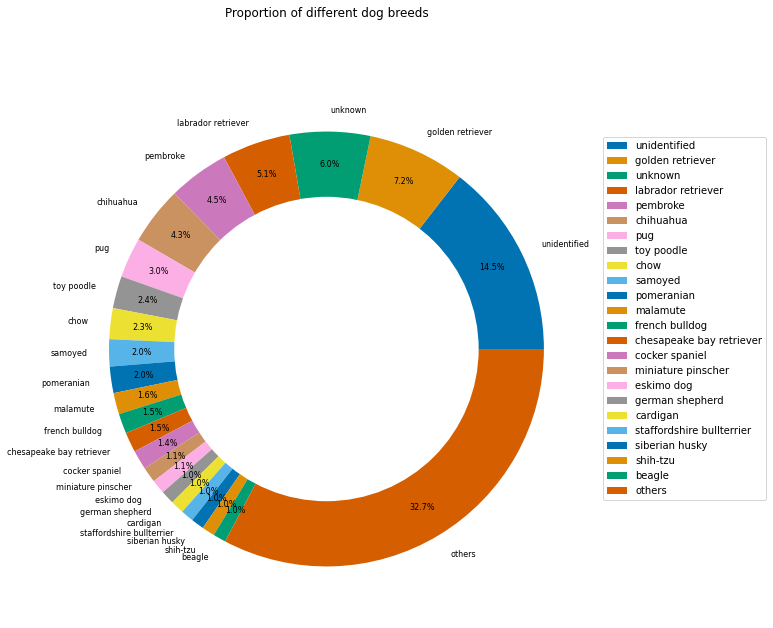

In [598]:
query_0 = "SELECT predicted_breed AS breed, COUNT(predicted_breed) AS number \
FROM twitter_dogs2 \
GROUP BY 1 \
ORDER BY 2 DESC"
engine.execute(query_0)
df_0 = pd.read_sql_query (query_0, engine)
# concat dog breed with proportion less than 1%
new_data=df_0.iloc[0:23,:]
short =df_0.iloc[0:23,:]
number_rest = df_0.iloc[23:,1].sum()
new_row= {'breed': 'others', 'number': [number_rest]}
rest = pd.DataFrame(new_row, index =[0])
new_short = pd.concat([short, rest])
plt.figure(figsize=(15,10))
colors = sns.color_palette('colorblind')
#create pie chart
pie= plt.pie(new_short['number'], labels = new_short['breed'], colors = colors,autopct='%1.1f%%', pctdistance =0.85, \
labeldistance = 1.1, textprops={'fontsize': 8})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(pie[0], new_short['breed'], loc="best", bbox_to_anchor = (1,0.9))
plt.title('Proportion of different dog breeds',x=0.5, y=1.1)
plt.savefig('query_0', dpi=300)
plt.show()

In [599]:
df_0.head(25)

,breed,number
0,unidentified,303
1,golden retriever,151
2,unknown,125
3,labrador retriever,106
4,pembroke,94
5,chihuahua,90
6,pug,62
7,toy poodle,50
8,chow,48
9,samoyed,42


The proportion of 'unknown' and 'unidentified' dogs breed together is 20.5%. 4/5 of data has an identified breed. So breed analysis could be performed. Only 23 dogs or 46.8% of all dogs breed has breed proportion more than 1%. 32.7% breeds have proportion less than 1% per breed. Golden retriever breed has the largest proportion of dogs -7.2% 	

**Query_1 - Popular breeds (top 20) by number of twitts aka the most tweeted:**

<Figure size 1080x720 with 0 Axes>

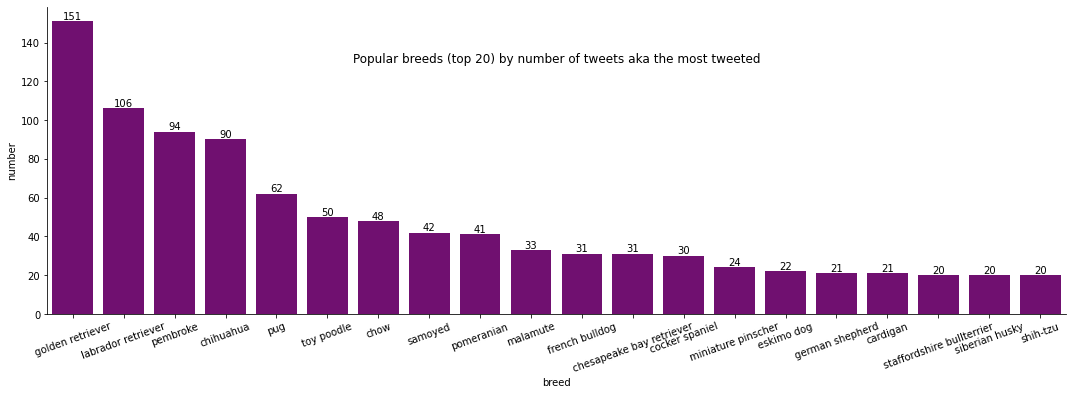

In [459]:
query_1= "SELECT predicted_breed AS breed, COUNT(predicted_breed) AS number \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown'\
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20"
engine.execute(query_1)
df_1 = pd.read_sql_query (query_1, engine)
plt.figure(figsize=(15,10))
grid=sns.catplot(x='breed', y='number', data=df_1, kind="bar", height=5,aspect=3, color='purple')
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.xticks(rotation=20)
plt.title('Popular breeds (top 20) by number of tweets aka the most tweeted',x=0.5, y=0.8)
plt.savefig('query_1.png', dpi=300)
plt.show()


Golden retrievers are the most popular dogs to tweet. Top 20 most tweeted dog breeds ranging from 151 to 20 dogs per breed, with median 32 dogs (more appropriate to use as values varies significantly).

**Query_2 - Unpopular breeds (bottom 20) by number of tweets aka the least tweeted:**

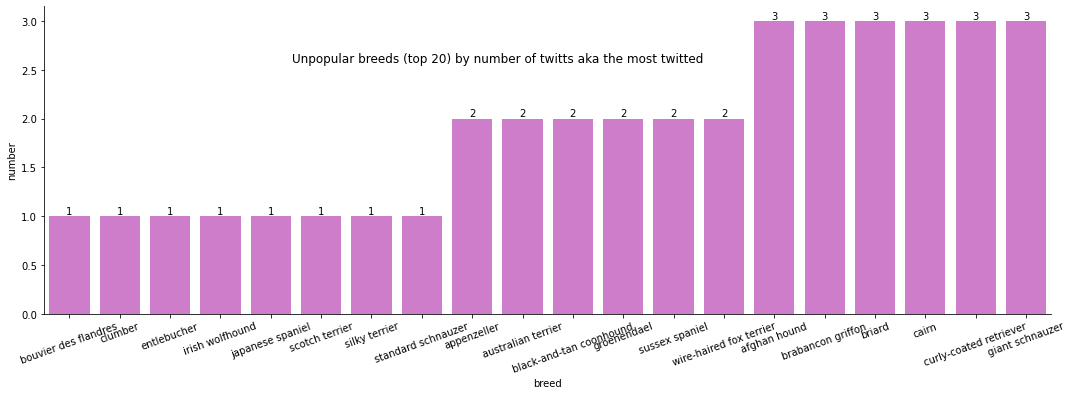

In [512]:
query_2 = "SELECT predicted_breed AS breed, COUNT(predicted_breed) AS number \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 ASC \
LIMIT 20"
engine.execute(query_2)
df_2 = pd.read_sql_query (query_2, engine)
grid=sns.catplot(x='breed', y='number', data=df_2, kind="bar", height=5,aspect=3, color='orchid')
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.xticks(rotation=20)
plt.title('Unpopular breeds (top 20) by number of twitts aka the most twitted',x=0.45, y=0.8)
plt.savefig('query_2', dpi=300)
plt.show()

In [463]:
df_2.head(20)

,breed,number
0,bouvier des flandres,1
1,clumber,1
2,entlebucher,1
3,irish wolfhound,1
4,japanese spaniel,1
5,scotch terrier,1
6,silky terrier,1
7,standard schnauzer,1
8,appenzeller,2
9,australian terrier,2


There is no much differance in top 20 most tweeted dog breeds range (1-3). Less tweeted dogs are bouvier des flandres, clumber,entlebucher, irish wolfhound, japanese spaniel, scotch terrier, silky terrier and standard schnauzer.

**Query_3 - Highly rated breeds (top 20) by average rating:**

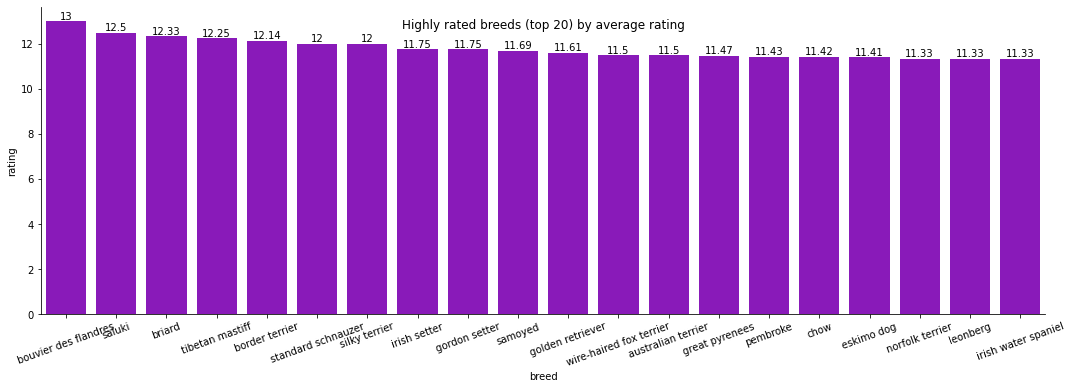

In [485]:
query_3 = "SELECT predicted_breed AS breed, ROUND(SUM(norm_rating_numerator)/COUNT(predicted_breed),2) AS rating \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
"
engine.execute(query_3)
df_3= pd.read_sql_query (query_3, engine)
grid = sns.catplot(x='breed', y='rating', data=df_3, kind="bar", height=5,aspect=3, color='darkviolet')
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.xticks(rotation=20)
plt.title('Highly rated breeds (top 20) by average rating',x=0.5, y=0.91)
plt.savefig('query_3', dpi=300)
plt.show()

In [486]:
df_3['rating'].mean()

11.787

In [487]:
df_3.head()

,breed,rating
0,bouvier des flandres,13.00
1,saluki,12.50
2,briard,12.33
3,tibetan mastiff,12.25
4,border terrier,12.14


I have used normalized rating calculating highly rated breeds. See cleaning issue_0. The rating of the dogs ranging from 13 to 11.3. The means is 11.8 out of 10. The top rated breed is bouvier des flandres.

**Query_4 - Popular breeds (top 20) by average number of favorites:**

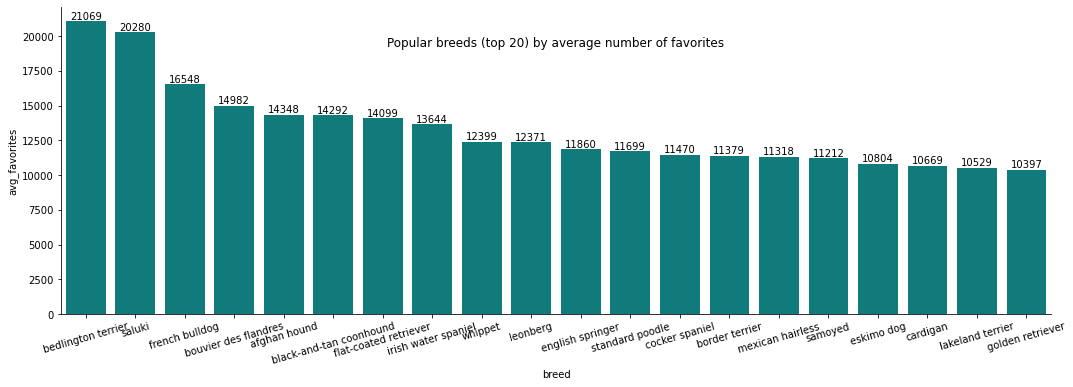

In [467]:
query_4 ="SELECT predicted_breed AS breed, count(predicted_breed) AS number, SUM(favorite_count)/COUNT(predicted_breed) AS avg_favorites \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 3 DESC \
LIMIT 20 "
engine.execute(query_4)
df_4= pd.read_sql_query (query_4, engine)
grid=sns.catplot(x='breed', y='avg_favorites', data=df_4, kind="bar", height=5,aspect=3, color='darkcyan')
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.xticks(rotation=16)
plt.title('Popular breeds (top 20) by average number of favorites',x=0.5, y=0.85)
plt.savefig('query_4', dpi=300)
plt.show()

In [468]:
df_4.head(20)

,breed,number,avg_favorites
0,bedlington terrier,6,21069
1,saluki,4,20280
2,french bulldog,31,16548
3,bouvier des flandres,1,14982
4,afghan hound,3,14348
5,black-and-tan coonhound,2,14292
6,flat-coated retriever,8,14099
7,irish water spaniel,3,13644
8,whippet,11,12399
9,leonberg,3,12371


In [469]:
df_4['avg_favorites'].mean()

13268.45

The dog breed with the most favourites(21069) is bedlington terrier although it has only 6 tweets, golden retriever with 151 tweets, but 10397 favourites is on the 20th place. Average favourites per top 20 breeds is 13268.45

**Query_5 - Popular breeds (top 20) by average number of retweets:**

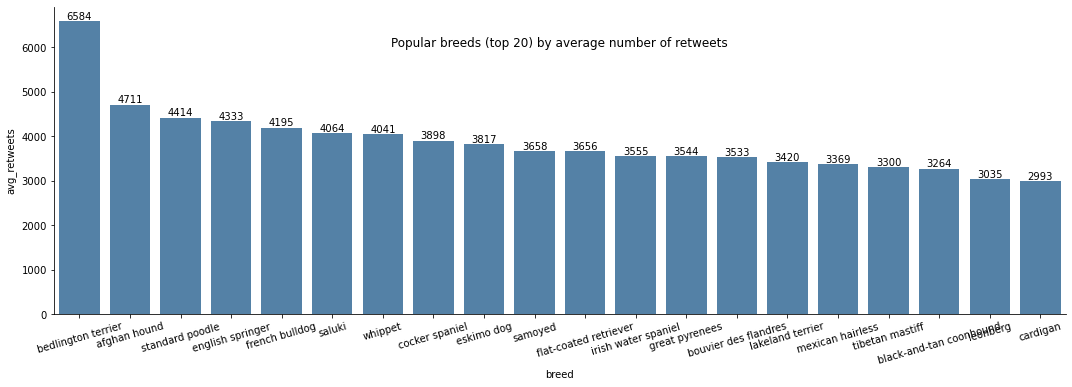

In [473]:
query_5 = "SELECT predicted_breed AS breed, count(predicted_breed) AS number, SUM(retweet_count)/COUNT(predicted_breed) AS avg_retweets \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 3 DESC \
LIMIT 20 "
engine.execute(query_5)
df_5= pd.read_sql_query (query_5, engine)
grid=sns.catplot(x='breed', y='avg_retweets', data=df_5, kind="bar", height=5,aspect=3, color='steelblue')
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.xticks(rotation=16)
plt.title('Popular breeds (top 20) by average number of retweets',x=0.5, y=0.85)
plt.savefig('query_5', dpi=300)
plt.show()

In [474]:
df_5.head(20)

,breed,number,avg_retweets
0,bedlington terrier,6,6584
1,afghan hound,3,4711
2,standard poodle,11,4414
3,english springer,10,4333
4,french bulldog,31,4195
5,saluki,4,4064
6,whippet,11,4041
7,cocker spaniel,30,3898
8,eskimo dog,22,3817
9,samoyed,42,3658


In [476]:
df_5['avg_retweets'].mean()

3869.2

The dog breed with the most retweets(6584) is bedlington terrier as well, golden retrever did not get in top 20. Cardigan has the least retweets number 2993 with 21 tweets in top 20 list. Average retweet number per breed is 3869.

**Query_6 - Dogs popular by both rater and public((top 20 intersection) by average number of favorites , retwitts and rating:**

In [508]:
query_6 = "WITH highly_rated_2 AS \
( \
SELECT predicted_breed, ROUND(SUM(norm_rating_numerator)/COUNT(predicted_breed),2) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
highly_rated AS (SELECT predicted_breed FROM highly_rated_2), \
favorites_2 AS \
( \
SELECT predicted_breed, SUM(favorite_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
favorites AS (SELECT predicted_breed FROM favorites_2), \
retweeted_2 AS \
( \
SELECT predicted_breed, SUM(retweet_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
retweeted AS (SELECT predicted_breed FROM retweeted_2) \
SELECT  predicted_breed AS breed \
FROM twitter_dogs2 \
WHERE (predicted_breed IN favorites) AND (predicted_breed IN highly_rated) AND (predicted_breed IN retweeted) \
GROUP BY 1 "
engine.execute(query_6)
df_6= pd.read_sql_query (query_6, engine)
df_6

,breed
0,bouvier des flandres
1,eskimo dog
2,irish water spaniel
3,leonberg
4,saluki
5,samoyed


Only five dogs got in all top 20s. They are highly rated, with high number of tweets and favourites. They are bouvier des flandres, eskimo dog,irish water spaniel, leonberg, saluki, samoyed.

**Query_7 - Dog breeds popular by public (top 20 intersection) by average number of favorites and retweets) :**

In [355]:
query_7 = "WITH favorites_2 AS \
( \
SELECT predicted_breed, SUM(favorite_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
favorites AS (SELECT predicted_breed FROM favorites_2), \
retweeted_2 AS \
( \
SELECT predicted_breed, SUM(retweet_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
retweeted AS (SELECT predicted_breed FROM retweeted_2) \
SELECT  predicted_breed \
FROM twitter_dogs2 \
WHERE (predicted_breed IN favorites) AND (predicted_breed IN retweeted) \
GROUP by 1"
engine.execute(query_7)
df_7= pd.read_sql_query (query_7, engine)
df_7

,predicted_breed
0,afghan hound
1,bedlington terrier
2,black-and-tan coonhound
3,bouvier des flandres
4,cardigan
5,cocker spaniel
6,english springer
7,eskimo dog
8,flat-coated retriever
9,french bulldog


18 dogs got in both retweets and favourites top 20. They are highly rated by public, with high number of tweets and favourites. They are afghan hound, bedlington terrier, black-and-tan coonhound, bouvier des flandres, cardigan, cocker spaniel, english springer, eskimo dog, flat-coated retriever, french bulldog, irish water spaniel, lakeland terrier, leonberg, mexican hairless, saluki, samoyed, standard poodle, whippet.

In [356]:
engine.execute("DROP VIEW IF EXISTS top_20_tweeted_breed")
engine.execute("CREATE VIEW top_20_tweeted_breed \
AS \
SELECT predicted_breed \
FROM \
( \
SELECT predicted_breed, COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20)")

In [357]:
engine.execute("DROP VIEW IF EXISTS bottom_20_tweeted_breed")
engine.execute("CREATE VIEW bottom_20_tweeted_breed \
AS \
SELECT predicted_breed \
FROM \
( \
SELECT predicted_breed, COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 ASC \
LIMIT 20)")

In [509]:
engine.execute("DROP VIEW IF EXISTS popular_by_public_and_rater")
engine.execute("CREATE VIEW popular_by_public_and_rater AS \
WITH highly_rated_2 AS \
( \
SELECT predicted_breed, ROUND(SUM(norm_rating_numerator)/COUNT(predicted_breed),2) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
highly_rated AS (SELECT predicted_breed FROM highly_rated_2), \
favorites_2 AS \
( \
SELECT predicted_breed, SUM(favorite_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
favorites AS (SELECT predicted_breed FROM favorites_2), \
retweeted_2 AS \
( \
SELECT predicted_breed, SUM(retweet_count)/COUNT(predicted_breed) \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
ORDER BY 2 DESC \
LIMIT 20 \
), \
retweeted AS (SELECT predicted_breed FROM retweeted_2) \
SELECT  predicted_breed \
FROM twitter_dogs2 \
WHERE (predicted_breed IN favorites) AND (predicted_breed IN highly_rated) AND (predicted_breed IN retweeted) \
GROUP BY 1")

**Query_8 - Popular breeds from top 20 tweeted breeds**

In [510]:
query_8 = "SELECT * FROM top_20_tweeted_breed \
WHERE predicted_breed IN popular_by_public_and_rater"
engine.execute(query_8)
df_8= pd.read_sql_query (query_8, engine)
df_8

,predicted_breed
0,samoyed
1,eskimo dog


Samoyed and eskimo dog highly rated by public and rater being the most tweeted  breed.

**Query_9 - Popular breeds from bottom 20 tweeted**

In [511]:
query_9 = "SELECT * FROM bottom_20_tweeted_breed \
WHERE predicted_breed IN popular_by_public_and_rater"
engine.execute(query_9)
df_9= pd.read_sql_query (query_9, engine)
df_9


,predicted_breed
0,bouvier des flandres


Bouvier des flandres highly rated by public and rater being in the top 20 least tweeted list.

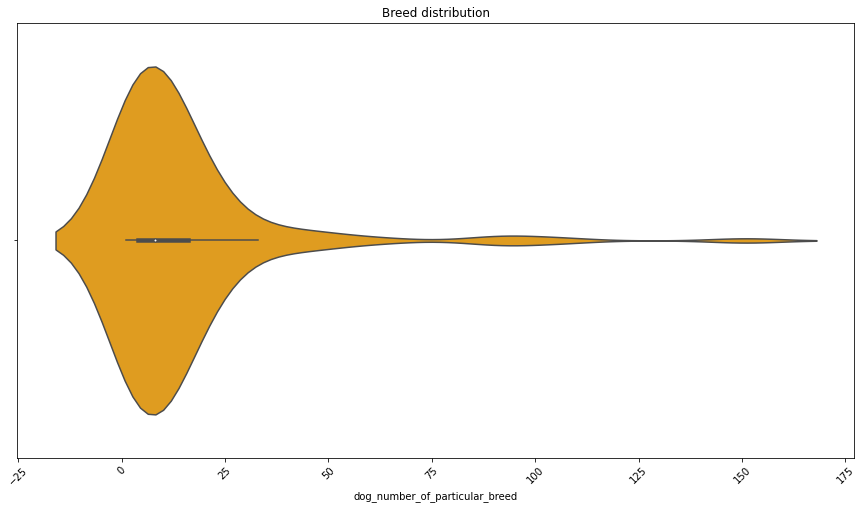

In [481]:
query_10 = "SELECT predicted_breed AS breed, COUNT(predicted_breed) AS dog_number_of_particular_breed \
FROM twitter_dogs2 \
WHERE predicted_breed!='unidentified' AND predicted_breed!='unknown' \
GROUP BY 1 \
OrDER BY 2 DESC "
engine.execute(query_10)
df_10 = pd.read_sql_query (query_10, engine)
df_10
plt.figure(figsize=(15,8))
sns.violinplot(x='dog_number_of_particular_breed', data=df_10, color='orange')
plt.xticks(rotation=45)
plt.title('Breed distribution')
plt.savefig('query_10', dpi=300)
plt.show()

In [362]:
df_10


,breed,dog_number_of_particular_breed
0,golden retriever,151
1,labrador retriever,106
2,pembroke,94
3,chihuahua,90
4,pug,62
...,...,...
108,japanese spaniel,1
109,irish wolfhound,1
110,entlebucher,1
111,clumber,1


Many dog breeds have under 10 breed associates on WeRateDogs, the majority have under 30 tweets per dog breed with occasional exceptions like **golden retrievers** (151), labrador retrievers(106), chihuahua (90) and pembroke (94).

In [515]:
joint_dogs_clean[joint_dogs_clean['predicted_breed']=='golden retriever']

,tweet_id,tweet_date,tweet_time,tweet_weekday,tweet_source,name,dog_stage,predicted_breed,confidence_interval,norm_rating_numerator,norm_rating_denominator,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,jpg_url,text,expanded_urls
143,858843525470990336,2017-05-01,00:40:27,0,iPhone,None,doggo,golden retriever,0.58,13.0,10,13.0,10,2987,13808,1,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1
192,846514051647705089,2017-03-28,00:07:32,1,iPhone,Barney,doggo,golden retriever,0.65,13.0,10,13.0,10,10237,40163,2,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1"
249,834574053763584002,2017-02-23,01:22:14,3,iPhone,None,doggo,golden retriever,0.23,13.0,10,13.0,10,2281,12517,1,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg,https://twitter.com/dog_rates/status/834574053763584002/photo/1
303,826958653328592898,2017-02-02,01:01:21,3,iPhone,Loki,doggo,golden retriever,0.62,12.0,10,12.0,10,4529,19827,1,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,https://twitter.com/dog_rates/status/826958653328592898/photo/1
332,821765923262631936,2017-01-18,17:07:18,2,iPhone,Duchess,doggo,golden retriever,0.98,13.0,10,13.0,10,1541,7712,1,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52,https://twitter.com/dog_rates/status/821765923262631936/photo/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10377,667160273090932737,2015-11-19,01:59:39,3,iPhone,Bradlay,unknown,golden retriever,0.47,11.0,10,11.0,10,50,213,1,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10 https://t.co/DKhgkMx4N1,https://twitter.com/dog_rates/status/667160273090932737/photo/1
10385,667044094246576128,2015-11-18,18:17:59,2,iPhone,None,unknown,golden retriever,0.77,12.0,10,12.0,10,43,158,1,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094246576128/photo/1
10416,666345417576210432,2015-11-16,20:01:42,0,iPhone,None,unknown,golden retriever,0.86,10.0,10,10.0,10,121,234,1,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,https://twitter.com/dog_rates/status/666345417576210432/photo/1
10429,666063827256086533,2015-11-16,01:22:45,0,iPhone,the,unknown,golden retriever,0.78,10.0,10,10.0,10,180,390,1,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1


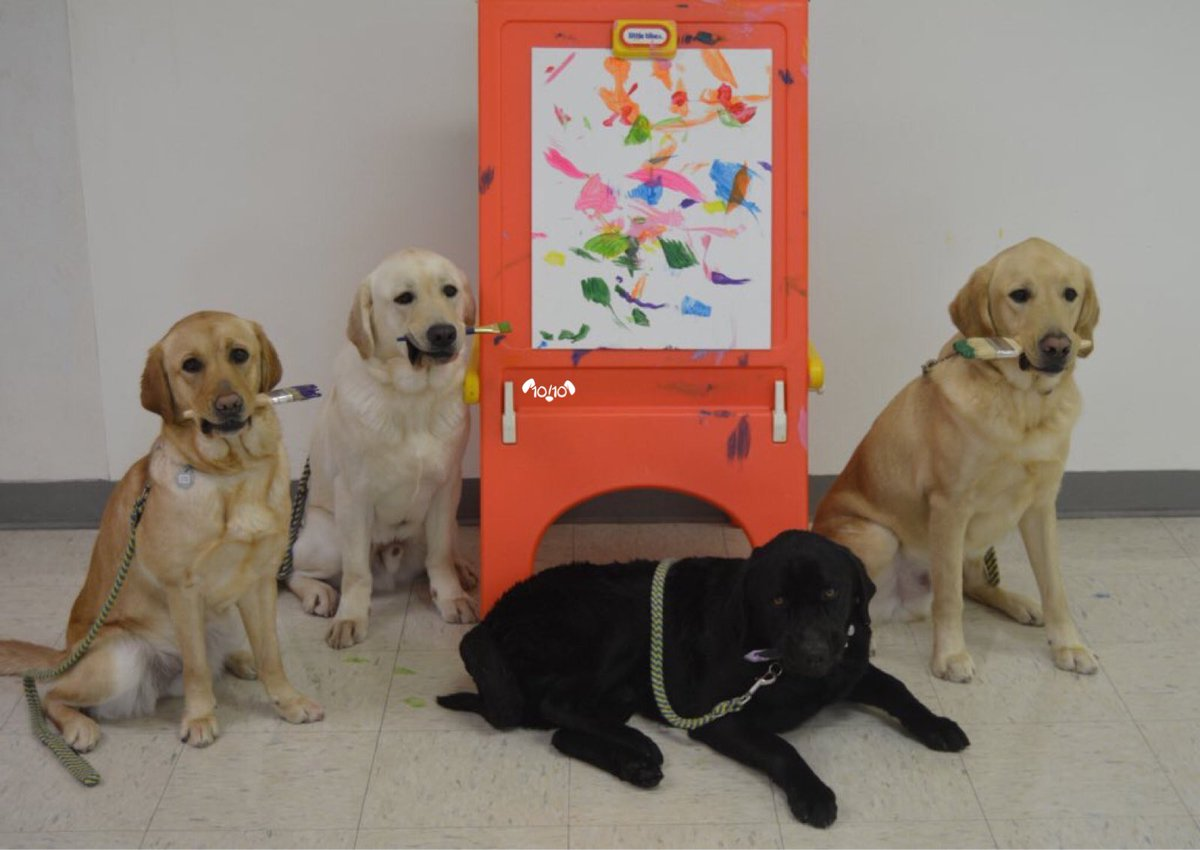

In [518]:
from IPython import display
display.Image("https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg")